# Prédiction des avis(note) des utilisateurs à partir de leurs commentaires

In [1]:
import pandas as pd
import numpy as np

# connection à la base mysql
import mysql.connector

connection_params = {
    'host': "localhost",
    'user': "souleymane",
    'password': "passsouleymane",
    'database': "pldac",
}

request = "select note, commentaire from avis"
notes,commentaires = [],[]
with mysql.connector.connect(**connection_params) as db :
    with db.cursor() as c:
        c.execute(request)
        resultats = c.fetchall()
        for note,commentaire in resultats:
            notes.append(note)
            commentaires.append(commentaire)

notes,commentaires = np.array(notes),np.array(commentaires)
print('notes:',len(notes),'commentaire:',len(commentaires))

ProgrammingError: 1045 (28000): Access denied for user 'souleymane'@'localhost' (using password: YES)

## Comptages des occurrences des mots et loi Zipf

In [ ]:
# loi Zipf 
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
bag_of_words = vectorizer.fit_transform(commentaires)  # creer le bow
sum_words = bag_of_words.sum(axis=0) # nb occurrences de chaque mot
words_freq = [(str(word), sum_words[0, idx]) for word, idx in     vectorizer.vocabulary_.items()] # couple (mot, freq)
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)  # trie par freq decroissante
print('nombre de mots:',len(words_freq))

nmots = 50
x = [w for w,f in words_freq[:nmots]]
y = [f for w,f in words_freq[:nmots]]

plt.figure()
plt.bar(x,y)
plt.axis('off')

In [5]:
k = 200
print([w for w,f in words_freq[:k]])  # les k mots les plus fréquents

['de', 'et', 'le', 'un', 'est', 'les', 'jeu', 'la', 'des', 'en', 'pas', 'pour', 'on', 'une', 'que', 'qui', 'il', 'mais', 'ce', 'du', 'plus', 'je', 'dans', 'ne', 'avec', 'très', 'bien', 'au', 'qu', 'tout', 'se', 'sur', 'ou', 'sont', 'vous', 'cartes', 'peu', 'par', 'même', 'si', 'joueurs', 'partie', 'fait', 'bon', 'peut', 'ai', 'faire', 'parties', 'ça', 'jouer', 'son', 'être', 'jeux', 'règles', 'sans', 'comme', 'trop', 'donc', 'faut', 'vraiment', 'aux', 'autres', 'me', 'petit', 'aussi', 'assez', 'car', 'ses', 'quand', 'nous', 'deux', 'moins', 'simple', 'beaucoup', 'matériel', 'temps', 'cette', 'mon', 'sa', 'fois', 'avoir', 'joueur', 'chaque', 'points', 'thème', 'là', 'où', 'tour', 'entre', 'cela', 'moi', 'encore', 'bonne', 'tous', 'plateau', 'carte', 'autre', 'après', 'alors', 'non', 'toujours', 'plaisir', 'rien', 'quelques', 'vite', 'reste', 'hasard', 'ont', 'suis', 'bref', 'dés', 'joue', 'choix', 'va', 'ces', 'ambiance', 'mal', 'lui', 'ma', 'surtout', 'coup', 'grand', 'soit', 'mécaniqu

## Visualisation en 2D

In [ ]:
# visualisation en 2d mais il ne passe, trop de temps puis il crache
k = 200
vectorizer = CountVectorizer(lowercase=True,stop_words=[w for w,f in words_freq[:k]])

corpus = list(commentaires)
corpus = " ".join(corpus)
Xu = vectorizer.fit_transform(commentaires)
print(Xu.shape)

In [ ]:

Xu = Xu.toarray()
U,S,V = np.linalg.svd(Xu.toarray(), full_matrices=False)
# lam, V = np.linalg.eig(Xu.T@Xu)

# tri et sélection des 2 vecteurs associés aux 2 plus grandes valeurs propres 
lam_tries_arg = np.argsort(lam)
lam_2_max = np.sort(lam_tries_arg[-2:])
vp = (V[:,lam_2_max])
Xu2D = Xu @ vp



In [ ]:
# affichage (plot) avec un code couleur pour les classes
plt.figure()
for c in range(0,10+1):
  Xc = Xu2D[notes==c]
  plt.scatter(Xc[:,0],Xc[:,1])

plt.legend(np.arange(10+1))

## Word cloud 

(-0.5, 399.5, 199.5, -0.5)

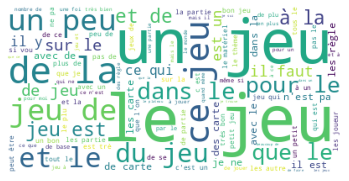

In [14]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS # Note: this is the default option    

corpus = list(commentaires)
corpus = " ".join(corpus)
# print(corpus[:50])
wordcloud = WordCloud(background_color='white', stopwords = STOPWORDS, max_words=100).generate(corpus) 

plt.figure()
plt.imshow(wordcloud)
plt.axis("off")


  Somme cumulée croissante: [0.00290438 0.00828317 0.03526634 0.04396732 0.10550291 0.14364119
 0.28683211 0.36786682 0.62993867 0.75481495 1.        ]


(-0.9400000000000001, 10.940000000000001, 0.0, 67837.35)

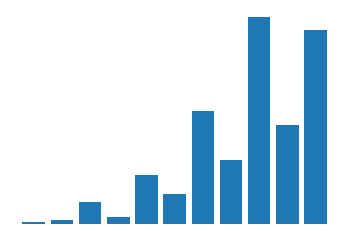

In [4]:
notes_un,nb_notes = np.unique(notes,return_counts=True)
# for i in range(notes_un.shape[0]):
#   print(notes_un[i],nb_notes[i])
print('\n  Somme cumulée croissante:',np.cumsum(nb_notes)/nb_notes.sum())

plt.figure()
plt.bar(notes_un,nb_notes)
plt.axis('off')

### Word cloud pour chaque classe

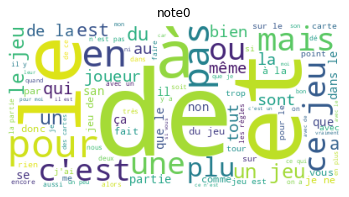

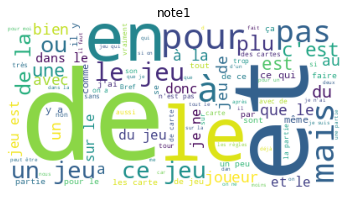

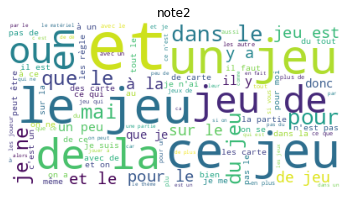

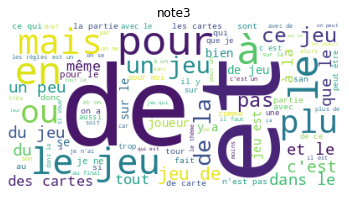

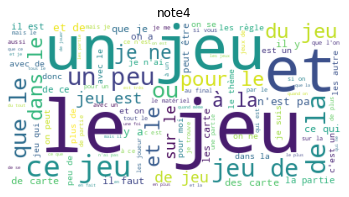

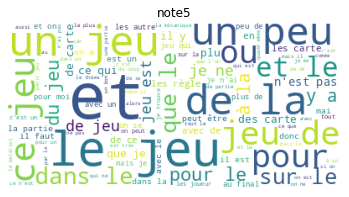

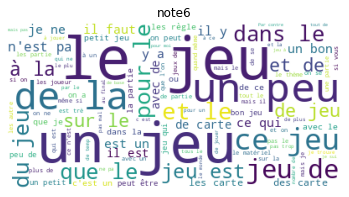

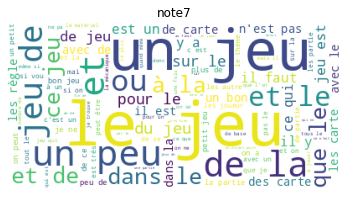

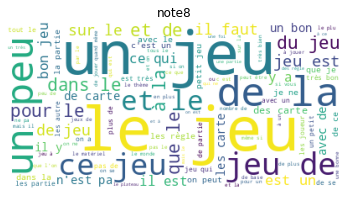

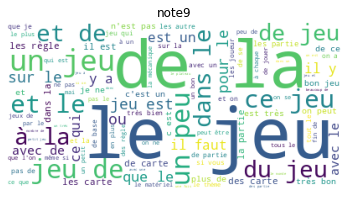

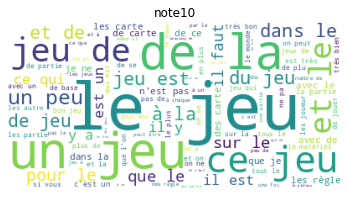

In [24]:
k = 0 # les k motes les plus fréquents à ne pas considérer
for i in range(notes_un.shape[0]):
  
  # commentaires de chaque note
  i_commentaire_note = notes == notes_un[i]
  commentaire_note = commentaires[i_commentaire_note]
  
  # les mots les plus fréquent de chaque note
  corpus_note = " ".join(list(commentaire_note))
  wordcloud = WordCloud(background_color='white', stopwords = [w for w,f in words_freq[:k]], max_words=100).generate(corpus_note)

  plt.figure()
  plt.imshow(wordcloud)
  plt.title('note '+str(i))
  plt.axis('off')

### Word cloud de chaque classe sans les k mots les plus fréquents

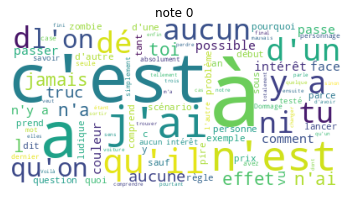

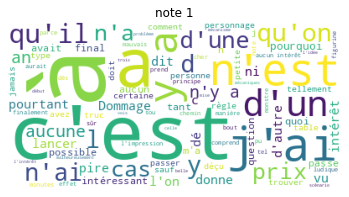

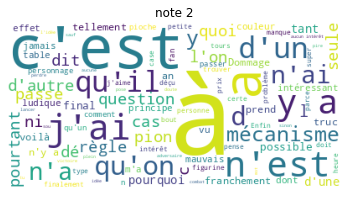

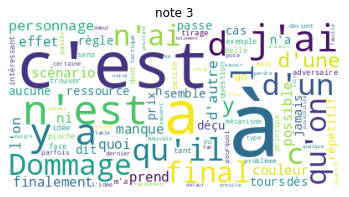

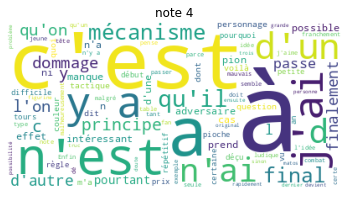

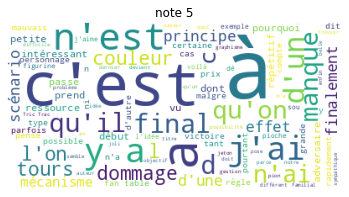

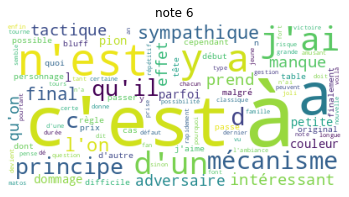

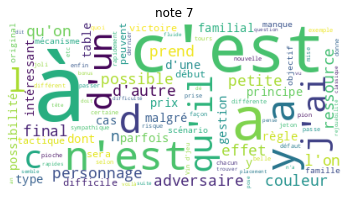

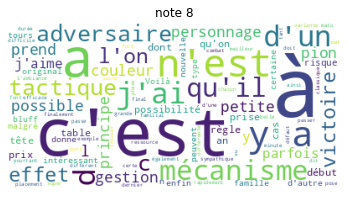

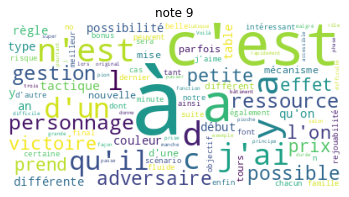

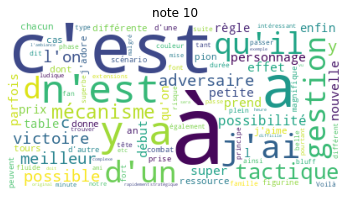

In [36]:
k = 200 # les k motes les plus fréquents à ne pas considérer
for i in range(notes_un.shape[0]):
  # print(notes_un[i],nb_notes[i])
  
  # commentaires de chaque note
  i_commentaire_note = notes == notes_un[i]
  commentaire_note = commentaires[i_commentaire_note]
  
  # les mots les plus fréquent de chaque note
  corpus_note = " ".join(list(commentaire_note))
  wordcloud = WordCloud(background_color='white', stopwords = [w for w,f in words_freq[:k]], max_words=100).generate(corpus_note)

  plt.figure()
  plt.imshow(wordcloud)
  plt.title('note '+str(i))
  plt.axis('off')

## Prédiction des notes à partir des commentaires

In [7]:
# séparation train test
from sklearn.model_selection import train_test_split

X,y = commentaires,notes
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=0) 

tt = len(y_train)+len(y_test)
print(len(y_train)/tt,len(y_test)/tt)

0.7999991887199623 0.20000081128003763


In [8]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

classes = y_train
corpus = X_train

vectorizer = CountVectorizer(lowercase=True)

X = vectorizer.fit_transform(corpus)
# print(vectorizer.get_feature_names()[:10]) # we only print a few
print(X.shape)

#Naïve Bayes
nb_clf = MultinomialNB()
nb_clf.fit(X, classes)


#Logistic Regression
lr_clf = LogisticRegression(random_state=0, solver='lbfgs',max_iter=1000,n_jobs=-1)
lr_clf.fit(X, classes)

#Linear SVM
svm_clf = LinearSVC(random_state=0, tol=1e-5)
svm_clf.fit(X, classes)


X_t = vectorizer.transform(X_test)

pred_nb = nb_clf.predict(X_t)
pred_lr = lr_clf.predict(X_t)
pred_svm = svm_clf.predict(X_t)


print(f"Naïve Bayes accuracy: {accuracy_score(y_test, pred_nb)}")
print(f"Logistic Regression accuracy: {accuracy_score(y_test, pred_lr)}")
print(f"SVM accuracy: {accuracy_score(y_test, pred_svm)}")

(197219, 129280)


/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Naïve Bayes accuracy: 0.39430078085386877
Logistic Regression accuracy: 0.45169861068857114
SVM accuracy: 0.47617888652266505


### Prédiction sans les k mots les plus fréquents

In [5]:
# apprentissage en supprimant les k mots les plus fréquents
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

classes = y_train
corpus = X_train

k = 200
vectorizer = CountVectorizer(lowercase=True,stop_words=[w for w,f in words_freq[:k]])

X = vectorizer.fit_transform(corpus)
# print(vectorizer.get_feature_names()[:10]) # we only print a few
print(X.shape)

#Naïve Bayes
nb_clf = MultinomialNB()
nb_clf.fit(X, classes)


#Logistic Regression
lr_clf = LogisticRegression(random_state=0, solver='lbfgs',max_iter=1000,n_jobs=-1)
lr_clf.fit(X, classes)

#Linear SVM
svm_clf = LinearSVC(random_state=0, tol=1e-5)
svm_clf.fit(X, classes)


X_t = vectorizer.transform(X_test)

pred_nb = nb_clf.predict(X_t)
pred_lr = lr_clf.predict(X_t)
pred_svm = svm_clf.predict(X_t)


print(f"Naïve Bayes accuracy: {accuracy_score(y_test, pred_nb)}")
print(f"Logistic Regression accuracy: {accuracy_score(y_test, pred_lr)}")
print(f"SVM accuracy: {accuracy_score(y_test, pred_svm)}")

(197219, 129080)


/usr/local/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Naïve Bayes accuracy: 0.3892911469425008
Logistic Regression accuracy: 0.45964912280701753
SVM accuracy: 0.4653889057904878


In [9]:
# apprentissage en supprimant les k mots les plus fréquents
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

classes = y_train
corpus = X_train

k = 2_000
vectorizer = CountVectorizer(lowercase=True,stop_words=[w for w,f in words_freq[:k]])

X = vectorizer.fit_transform(corpus)
# print(vectorizer.get_feature_names()[:10]) # we only print a few
print(X.shape)

#Naïve Bayes
nb_clf = MultinomialNB()
nb_clf.fit(X, classes)


#Logistic Regression
lr_clf = LogisticRegression(random_state=0, solver='lbfgs',max_iter=1000,n_jobs=-1)
lr_clf.fit(X, classes)

#Linear SVM
svm_clf = LinearSVC(random_state=0, tol=1e-5)
svm_clf.fit(X, classes)


X_t = vectorizer.transform(X_test)

pred_nb = nb_clf.predict(X_t)
pred_lr = lr_clf.predict(X_t)
pred_svm = svm_clf.predict(X_t)


print(f"Naïve Bayes accuracy: {accuracy_score(y_test, pred_nb)}")
print(f"Logistic Regression accuracy: {accuracy_score(y_test, pred_lr)}")
print(f"SVM accuracy: {accuracy_score(y_test, pred_svm)}")

(197219, 127280)


/usr/local/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Naïve Bayes accuracy: 0.3633100091268634
Logistic Regression accuracy: 0.41973430686542945
SVM accuracy: 0.4330798093499645


In [35]:
# apprentissage en supprimant les k mots les plus fréquents
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer

classes = y_train
corpus = X_train

vectorizer = TfidfVectorizer(lowercase=True,min_df=0.05,max_df=0.2)

X = vectorizer.fit_transform(corpus)
# print(vectorizer.get_feature_names()[:10]) # we only print a few
print(X.shape)

#Naïve Bayes
nb_clf = MultinomialNB()
nb_clf.fit(X, classes)


#Logistic Regression
lr_clf = LogisticRegression(random_state=0, solver='lbfgs',max_iter=1000,n_jobs=-1)
lr_clf.fit(X, classes)

#Linear SVM
svm_clf = LinearSVC(random_state=0, tol=1e-5)
svm_clf.fit(X, classes)


X_t = vectorizer.transform(X_test)

pred_nb = nb_clf.predict(X_t)
pred_lr = lr_clf.predict(X_t)
pred_svm = svm_clf.predict(X_t)


print(f"Naïve Bayes accuracy: {accuracy_score(y_test, pred_nb)}")
print(f"Logistic Regression accuracy: {accuracy_score(y_test, pred_lr)}")
print(f"SVM accuracy: {accuracy_score(y_test, pred_svm)}")

(197219, 120)
Naïve Bayes accuracy: 0.29234357570226144
Logistic Regression accuracy: 0.3032958117837947
SVM accuracy: 0.3070276848189839


In [37]:
# apprentissage en supprimant les k mots les plus fréquents
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer

classes = y_train
corpus = X_train

vectorizer = TfidfVectorizer(lowercase=True,min_df=0.02,max_df=0.8)

X = vectorizer.fit_transform(corpus)
# print(vectorizer.get_feature_names()[:10]) # we only print a few
print(X.shape)

#Naïve Bayes
nb_clf = MultinomialNB()
nb_clf.fit(X, classes)


#Logistic Regression
lr_clf = LogisticRegression(random_state=0, solver='lbfgs',max_iter=1000,n_jobs=-1)
lr_clf.fit(X, classes)

#Linear SVM
svm_clf = LinearSVC(random_state=0, tol=1e-5)
svm_clf.fit(X, classes)


X_t = vectorizer.transform(X_test)

pred_nb = nb_clf.predict(X_t)
pred_lr = lr_clf.predict(X_t)
pred_svm = svm_clf.predict(X_t)


print(f"Naïve Bayes accuracy: {accuracy_score(y_test, pred_nb)}")
print(f"Logistic Regression accuracy: {accuracy_score(y_test, pred_lr)}")
print(f"SVM accuracy: {accuracy_score(y_test, pred_svm)}")

(197219, 397)
Naïve Bayes accuracy: 0.31325423385052226
Logistic Regression accuracy: 0.34110130818375417
SVM accuracy: 0.3428658351080012


### bigramme trigramme

In [38]:
# apprentissage en supprimant les k mots les plus fréquents
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer

classes = y_train
corpus = X_train

vectorizer = TfidfVectorizer(lowercase=True,stop_words=[w for w,f in words_freq[:k]],ngram_range=(1,3))

X = vectorizer.fit_transform(corpus)
# print(vectorizer.get_feature_names()[:10]) # we only print a few
print(X.shape)

#Naïve Bayes
nb_clf = MultinomialNB()
nb_clf.fit(X, classes)


#Logistic Regression
lr_clf = LogisticRegression(random_state=0, solver='lbfgs',max_iter=1000,n_jobs=-1)
lr_clf.fit(X, classes)

#Linear SVM
svm_clf = LinearSVC(random_state=0, tol=1e-5)
svm_clf.fit(X, classes)


X_t = vectorizer.transform(X_test)

pred_nb = nb_clf.predict(X_t)
pred_lr = lr_clf.predict(X_t)
pred_svm = svm_clf.predict(X_t)


print(f"Naïve Bayes accuracy: {accuracy_score(y_test, pred_nb)}")
print(f"Logistic Regression accuracy: {accuracy_score(y_test, pred_lr)}")
print(f"SVM accuracy: {accuracy_score(y_test, pred_svm)}")

### Prédiction avec séparation des notes en deux classes

In [10]:
# apprentissage en supprimant les k mots les plus fréquents
# classification binaire decoupage (0 à 7 -> -1) (8 à 10 -> 1)
classes = [1 if note>7 else -1 for note in y_train]
corpus = X_train

k = 200
vectorizer = CountVectorizer(lowercase=True,stop_words=[w for w,f in words_freq[:k]])

X = vectorizer.fit_transform(corpus)
# print(vectorizer.get_feature_names()[:10]) # we only print a few
print(X.shape)

#Naïve Bayes
nb_clf = MultinomialNB()
nb_clf.fit(X, classes)


#Logistic Regression
lr_clf = LogisticRegression(random_state=0, solver='lbfgs',max_iter=1000,n_jobs=-1)
lr_clf.fit(X, classes)

#Linear SVM
svm_clf = LinearSVC(random_state=0, tol=1e-5)
svm_clf.fit(X, classes)


X_t = vectorizer.transform(X_test)

pred_nb = nb_clf.predict(X_t)
pred_lr = lr_clf.predict(X_t)
pred_svm = svm_clf.predict(X_t)

y_test_bin = [1 if note>7 else -1 for note in y_test]
print(f"Naïve Bayes accuracy: {accuracy_score(y_test_bin, pred_nb)}")
print(f"Logistic Regression accuracy: {accuracy_score(y_test_bin, pred_lr)}")
print(f"SVM accuracy: {accuracy_score(y_test_bin, pred_svm)}")

(197219, 129080)


/usr/local/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Naïve Bayes accuracy: 0.7454822026163676
Logistic Regression accuracy: 0.762052530169354
SVM accuracy: 0.7609573065612006


### Prédiction des notes avec la régression linéaire

In [11]:
# Regression lineaire
# apprentissage en supprimant les k mots les plus fréquents
from sklearn.linear_model import LinearRegression

classes = y_train
corpus = X_train

k = 200
vectorizer = CountVectorizer(lowercase=True,stop_words=[w for w,f in words_freq[:k]])

X = vectorizer.fit_transform(corpus)
# print(vectorizer.get_feature_names()[:10]) # we only print a few
print(X.shape)

#Linear Regression
lr = LinearRegression()
lr.fit(X, classes)

X_t = vectorizer.transform(X_test)

pred_lr = lr.score(X_t,y_test)


print(f"Linear Regression score: {pred_lr}")

(197219, 129080)
Linear Regression score: -5.239259323130711


In [12]:
pred_lr

-5.239259323130711

In [1]:
pred_lr = lr.predict(X_t)
err = ((pred_lr-y_test)).sum() / len(y_test)
print('Erreur moyenne:',err)

NameError: name 'lr' is not defined

In [15]:
np.unique(pred_lr)

array([-139.62267551, -125.098685  ,  -83.22512571, ...,   87.65588003,
        105.2573713 ,  117.70404446])

Le résultat n'est pas aussi satisfaisant que ça

# Clustering avec KMeans

In [27]:
# on supprime les colonnes des mots frequents
k = 200
words_un = [w for w,f in words_freq[:k]]
nom_cols = [word for word, idx in vectorizer.vocabulary_.items() if word not in words_un]
i_cols = [idx for word, idx in vectorizer.vocabulary_.items() if word not in words_un]
bow = bag_of_words[:,i_cols]

print(len(nom_cols),len(i_cols),'\n',bag_of_words.shape,bow.shape)

127280 127280 
 (246524, 140837) (246524, 127280)


In [31]:

print(len(words_freq)-len(words_un),len(nom_cols))

140637 127280


In [12]:
from sklearn.cluster import KMeans

n_clusters = 11
kmeans = KMeans(n_clusters=n_clusters, random_state=0, max_iter=100).fit(bow)
y_pred = kmeans.predict(bow)

/usr/local/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


cluster: 0 classe maj: 0 [0, 2, 0]
cluster: 1 classe maj: 0 [0, 1, 0]
cluster: 2 classe maj: 1 [0, 0, 0]
cluster: 3 classe maj: 1 [0, 3, 0]
cluster: 4 classe maj: 0 [1, 3, 1]
cluster: 5 classe maj: 3 [0, 0, 0]
cluster: 6 classe maj: 0 [1, 1, 0]
cluster: 7 classe maj: 0 [0, 5, 0]
cluster: 8 classe maj: 0 [0, 6, 0]
cluster: 9 classe maj: 10 [0, 0, 0]
cluster: 10 classe maj: 0 [0, 0, 0]


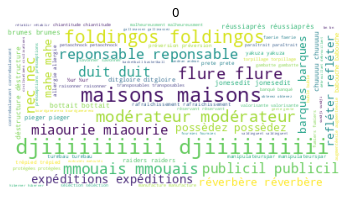

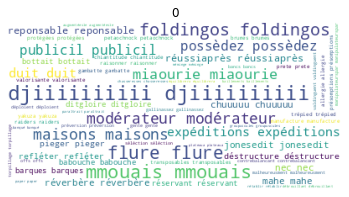

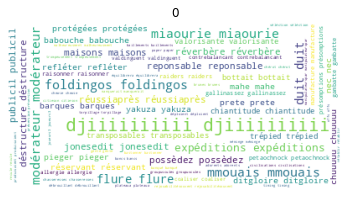

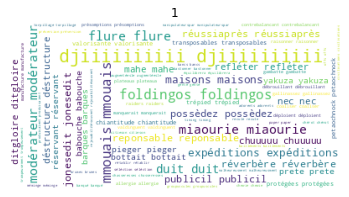

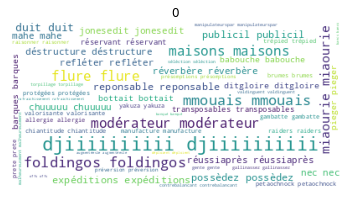

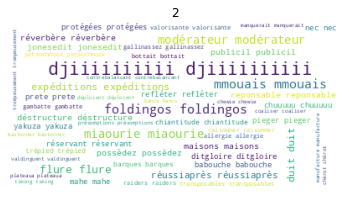

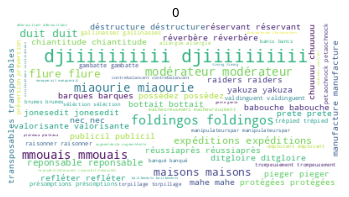

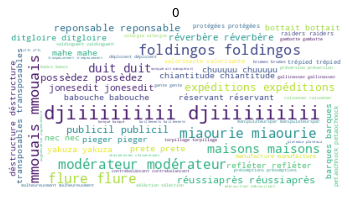

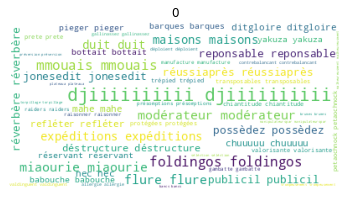

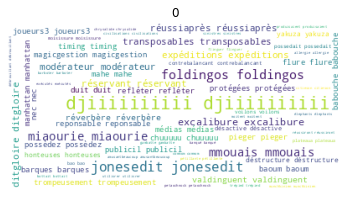

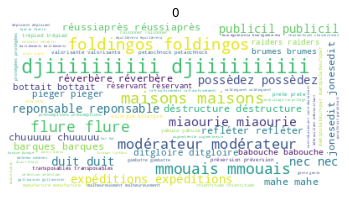

In [17]:
# Getting clusters:
l_cl_major = []
for c in range(n_clusters):
  i_cl = y_pred == c
  cls,nb_cls = np.unique(notes[i_cl],return_counts=True)
  i_cls_trie = np.argsort(nb_cls)
  c_major = cls[i_cls_trie[0]]
  l_cl_major.append(c_major)
  sum_words = bow[i_cl].sum(axis=0).tolist()[0]
  print('cluster:',c,'classe maj:',c_major,sum_words[:3])
  
  # recopie chaque mot le nombre de fois qu'il est présent dans le cluster
  corpus_cl = []
  for i in range(len(nom_cols)):
    corpus_cl += [nom_cols[i]] * sum_words[i]
  corpus_cl = " ".join(corpus_cl)
  wordcloud = WordCloud(background_color='white', stopwords = [], max_words=100).generate(corpus_cl)

  plt.figure()
  plt.imshow(wordcloud)
  plt.title(i_cls_trie[0])
  plt.axis('off')

In [25]:
words_freq[:4]

[('de', 964457), ('et', 520440), ('le', 514119), ('un', 460058)]